In [55]:
from jax import vmap, jit, config
import jax.numpy as jnp
import jax.scipy.stats as jst
import matplotlib.pyplot as plt
from functools import partial 
import matplotlib.pyplot as plt 
config.update("jax_enable_x64", True)

def X_plus_Y_given_n(r: int, n: int):
    vectorize = lambda func: jit(vmap(func))
    poisson = jst.poisson.pmf

    def condition(mu1, mu2):
        sum_over_r = jnp.arange(0, n + 1)
        calc = lambda r: poisson(k=r, mu=mu1) * poisson(k=n - r, mu=mu2)
        return vectorize(calc)(sum_over_r)

    def joint(mu1, mu2):
        return poisson(k=r, mu=mu1) * poisson(k=n - r, mu=mu2)

    def process(mu1, mu2):
        return joint(mu1, mu2) / jnp.sum(condition(mu1, mu2))

    return (process)


In [56]:
n= 50
states =jnp.array( [(r , n) for r in range (0,n+1)])

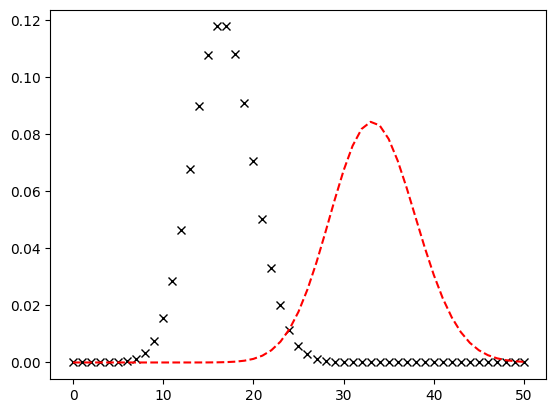

In [67]:
Xs= list (X_plus_Y_given_n(*state) for state in states )
res = list (expermient(1,2) for expermient in  Xs)
k = jnp.arange (0 , n+1 )
binom = jst.binom.pmf (p = 1/3 , k = k , n=100)
plt.plot (k ,res , "kx" )
plt.plot (k ,binom , "r--"  )

In [65]:
sum (res)

Array(1., dtype=float64)

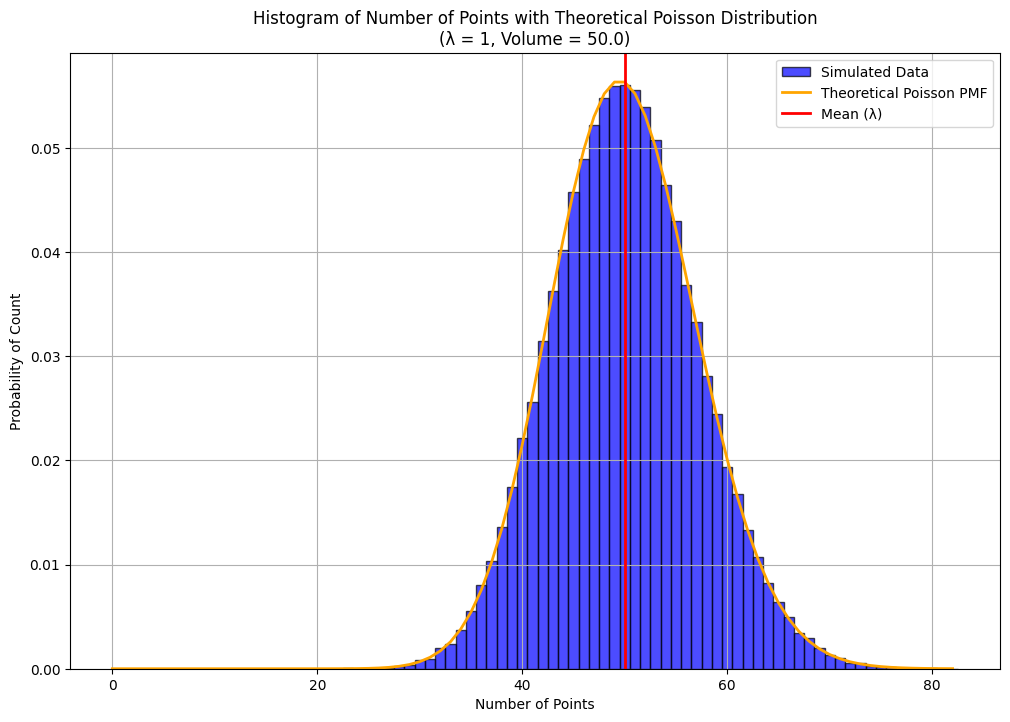

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
lambda_rate = 1  # intensity (average number of points per unit area per unit time)
Lx, Ly = 10, 10  # dimensions of the region
T = 0.5  # time duration in seconds
num_simulations = 100000  # number of repetitions

# Calculate the expected number of points
volume = Lx * Ly * T  # area * time
expected_points = lambda_rate * volume

# Store the number of points for each simulation
num_points_list = []

for _ in range(num_simulations):
    # Generate the number of points from a Poisson distribution
    num_points = np.random.poisson(expected_points)
    num_points_list.append(num_points)

# Plot the histogram of the number of points
plt.figure(figsize=(12, 8))
count, bins, ignored = plt.hist(num_points_list, bins=np.arange(min(num_points_list) - 0.5, max(num_points_list) + 1.5, 1), color='blue', edgecolor='black', alpha=0.7, density=True, label='Simulated Data')

# Plot the theoretical Poisson distribution
x = np.arange(0, max(num_points_list) + 1)
poisson_pmf = poisson.pmf(x, expected_points)
plt.plot(x, poisson_pmf, 'orange', lw=2, label='Theoretical Poisson PMF')

# Add a vertical line for the mean
plt.axvline(expected_points, color='red', linestyle='-', linewidth=2, label='Mean (λ)')

# Add titles, labels, and legend
plt.title(f'Histogram of Number of Points with Theoretical Poisson Distribution\n(λ = {lambda_rate}, Volume = {volume})')
plt.xlabel('Number of Points')
plt.ylabel('Probability of Count')
plt.legend()
plt.grid(True)
plt.show()
